# Zejście gradientowe

Spadek gradientowy to technika matematyczna, która zmniejsza wartość funkcji błędu - co w konsekwencji poprawia dokładność modelu.

Algorytm wygląda następująco:

1. Ustaw losowe wagi $ \beta $.

2. Oblicz gradient funkcji straty:

    $$
    \nabla f = 2X^\intercal(X\beta - y)
    $$

    gdzie: 

    $ \nabla f $ – gradient funkcji  
    $ X $ – macierz cech niezależnych  
    $ X^\intercal $ – macierz transponowana cech niezależnych  
    $ \beta $ – macierz wag  
    $ y $ – tablica rzeczywistych cech zależnych  

3. Zaktualizuj wagi za pomocą wzoru:

    $$
    \beta_{t+1} = \beta_{t} - \eta \nabla f
    $$

    gdzie:

    $ \beta_{t+1} $ – zaktualizowana macierz wag  
    $ \beta_t $ – aktualna macierz wag  
    $ \eta $ – wielkość kroku (learning rate)

4. Powtarzaj kroki 2–4.

Gradient funkcji to wektor wskazujący kierunek, w którym funkcja rośnie najszybciej. Poruszając się przeciwnie do gradientu, szukamy minimum funkcji błędu — im mniejsza funkcja błędu, tym model dokładniejszy.


## Import bibliotek i przygotowanie danych

Do przetestowania zejścia gradientowego wygeneruje 100 elementowy, jednowymiarowy zbiór X za pomocą funkcji **np.random.randn()**, która wybiera liczby za pomocą rozkładu normalnego.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X = np.random.randn(100, 1) * 3
y = 2 * X[:, 0] + np.random.randn(100) * 3

## Obliczanie wag za pomocą gotowej klasy

Klasycznym podejściem jest użycie klasy **LinearRegression**, która przyjmuje jako argument wektory 100x1.

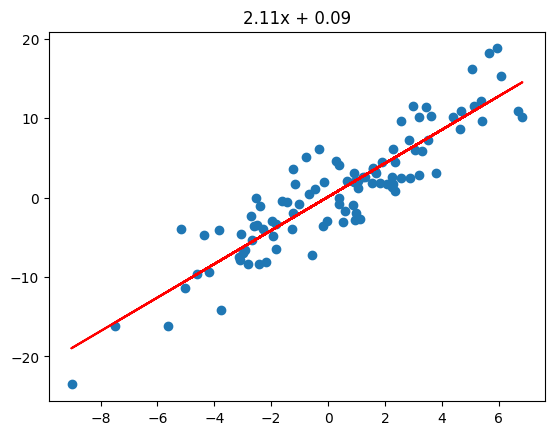

In [2]:
model = LinearRegression()
model.fit(X, y)

plt.scatter(X[:, 0], y)
plt.plot(X, model.coef_*X + model.intercept_, color='red')
sign = '+' if model.intercept_ > 0 else '-'
plt.title(f"{model.coef_[0]:.2f}x {sign} {abs(model.intercept_):.2f}")
plt.show()

## Obliczanie wag za pomocą zejścia gradientowego

Aby móc obliczać tym sposobem wagi należy zmodyfikować zbiór X. Każda tablica musi zaczynać się od jedynki co reprezentuje współczynnik przy wyrazie wolnym. Dzięki temu, dla naszego przykładu, każdy element zbioru **X** to tablica **(1, X)**, a zbiór **beta** zawiera współczynniki **(b, a)**.

Znak **@** oznacza mnożenie wektorowe.

In [3]:
ones = np.ones((100, 1))
X_new = np.concatenate([ones, X], axis = 1)
beta = np.random.randn(2)

for i in range(450):
    gradient = 2 * np.transpose(X_new) @ ((X_new @ beta) - y)
    beta -= 0.0001 * gradient

coef_new = beta[1:]
intercept_new = beta[0]

Teraz regresję można przedstawić na wykresie.

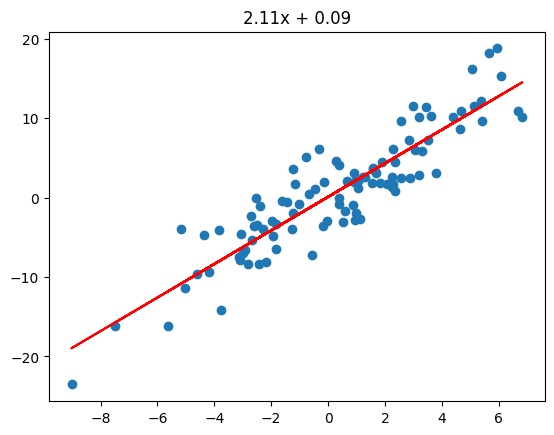

In [4]:
plt.scatter(X_new[:, 1], y)
plt.plot(X, coef_new*X + intercept_new, color='red')
sign = '+' if intercept_new > 0 else '-'
plt.title(f"{coef_new[0]:.2f}x {sign} {abs(intercept_new):.2f}")
plt.show()

Okazuje się, że obliczone wagi zgadzają się z gotowym modelem do 4 miejsca po przecinku dla współczynnika **a**, i do 3 miejsca po przecinku dla współczynnika **b**.

In [5]:
print(f"Wygenerowane przez LinearRegression(): a = {model.coef_[0]}, b = {model.intercept_}")
print(f"Obliczone za pomocą zejścia gradientowego: a = {beta[1]}, b = {beta[0]}")

Wygenerowane przez LinearRegression(): a = 2.1128151851526122, b = 0.09139701464632966
Obliczone za pomocą zejścia gradientowego: a = 2.1128094825275654, b = 0.09154480795625974
